In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import numpy as np
import scipy
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [30]:
def visualise(setting):
    if setting == "random":
        name = "Random Actions"
    elif setting == "spurious":
        name = "Spurious Correlations"
    elif setting == "expert":
        name = "Expert Demonstrations"
    
    df = pd.read_csv(f"wm2434-swm1590-{setting}.csv")
    df_swm2110 = pd.read_csv(f"swm2110-{setting}.csv")
    df_swm1850 = pd.read_csv(f"swm1850-{setting}.csv")

    wm = df['wm_agent_reward']
    swm1590 = df['swm_agent_reward']
    swm1850 = df_swm1850['swm_agent_reward']
    swm2110 = df_swm2110['swm_agent_reward']
    n = len(wm)

    plot = pd.DataFrame({
        f"{name} Dataset": ['WM\n(Params = 2434)']*n + ['SWM\n(Params = 1590)']*n,
        'Reward': pd.concat([wm, swm1590], ignore_index=True)
    })

    f, ax = plt.subplots()
    sns.set_style("whitegrid")
    sns.barplot(x=f"{name} Dataset", y="Reward", data=plot, palette="vlag", errwidth=2)
    change_width(ax, 0.7)
    sns.stripplot(x=f"{name} Dataset", y="Reward", data=plot, color="gray", linewidth=0)
    sns.despine(trim=True, left=True)

    print(f"WM 2434: {wm.mean():.3f}")
    print(f"SWM 1590: {swm1590.mean():.3f}")
    print(f"SWM 1590 Improvement: {swm1590.mean() - wm.mean():.3f}")
    
    plot = pd.DataFrame({
        f"{name} Dataset": ['SWM\n(Params = 1590)']*n + ['SWM\n(Params = 1850)']*n + ['SWM\n(Params = 2110)']*n,
        'Reward': pd.concat([swm1590, swm1850, swm2110], ignore_index=True)
    })
    
    f, ax = plt.subplots()
    sns.set_style("whitegrid")
    sns.barplot(x=f"{name} Dataset", y="Reward", data=plot, palette="vlag", errwidth=2)
    change_width(ax, 0.7)
    sns.stripplot(x=f"{name} Dataset", y="Reward", data=plot, color="gray", linewidth=0)
    sns.despine(trim=True, left=True)
    
    
    print(f"SWM 1850: {swm1850.mean():.3f}")
    print(f"SWM 2110: {swm2110.mean():.3f}")

WM 2434: 31.529
SWM 1590: 48.054
SWM 1590 Improvement: 16.525
SWM 1850: 50.548
SWM 2110: 50.614


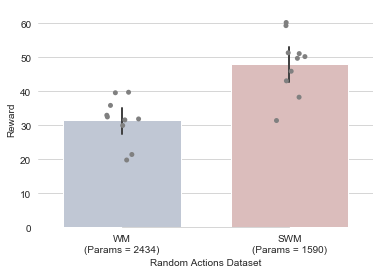

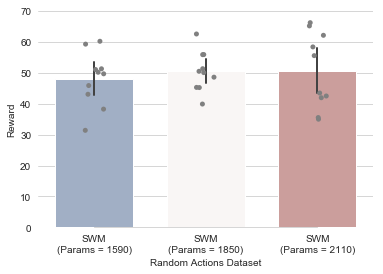

In [31]:
visualise("random")

WM 2434: 30.963
SWM 1590: 45.128
SWM 1590 Improvement: 14.165
SWM 1850: 43.996
SWM 2110: 41.906


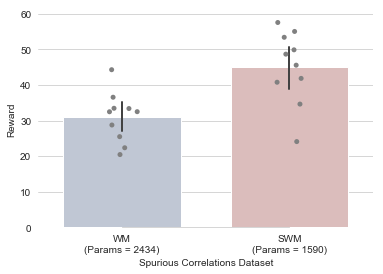

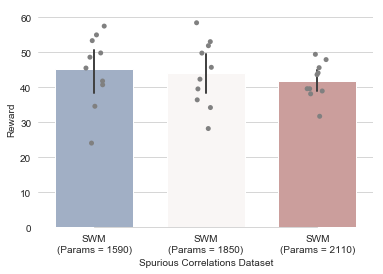

In [32]:
visualise("spurious")

WM 2434: 18.717
SWM 1590: 20.699
SWM 1590 Improvement: 1.982
SWM 1850: 21.574
SWM 2110: 19.935


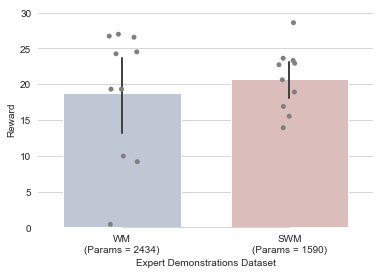

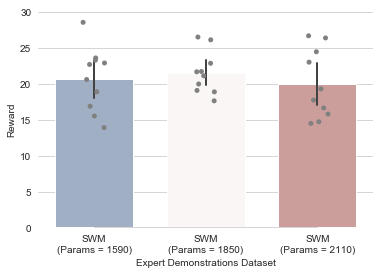

In [33]:
visualise("expert")